<a href="https://colab.research.google.com/github/strateg17/fake-news/blob/dev/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Git clone

In [1]:
!git clone https://github.com/strateg17/fake-news.git

Cloning into 'fake-news'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 88 (delta 8), reused 0 (delta 0), pack-reused 70
Receiving objects: 100% (88/88), 133.36 MiB | 21.48 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (15/15), done.


In [2]:
%cd fake-news

/content/fake-news


In [6]:

!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [5]:
!git branch topic-modeling

In [8]:
!git checkout topic-modeling

Switched to branch 'topic-modeling'


## EDA

In [9]:
import pandas as pd

In [11]:
data_kaggle_true = pd.read_parquet('data/parquets/data_kaggle_true.parquet')

In [12]:
data_kaggle_true

,Title,Text,Subject,Date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22


from matplotlib import pyplot as plt
import seaborn as sns
data_kaggle_true.groupby('Subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_kaggle_true.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Subject')):
  _plot_series(series, series_name, i)
  fig.legend(title='Subject', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_kaggle_true.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Subject')):
  _plot_series(series, series_name, i)
  fig.legend(title='Subject', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

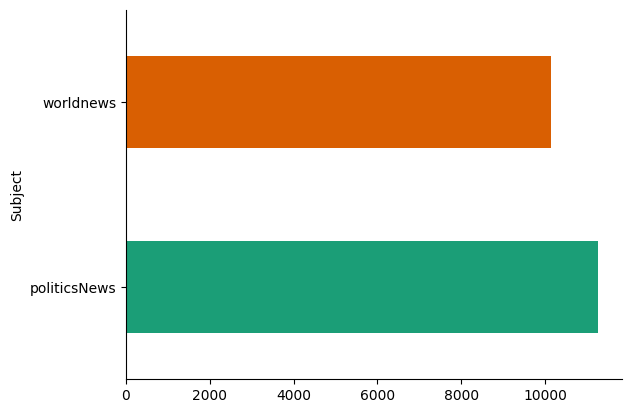

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
data_kaggle_true.groupby('Subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
data_kaggle_fake = pd.read_parquet('data/parquets/data_kaggle_fakes.parquet')

In [16]:
data_kaggle_fake

,Title,Text,Subject,Date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


from matplotlib import pyplot as plt
import seaborn as sns
data_kaggle_fake.groupby('Subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_kaggle_fake.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Subject')):
  _plot_series(series, series_name, i)
  fig.legend(title='Subject', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

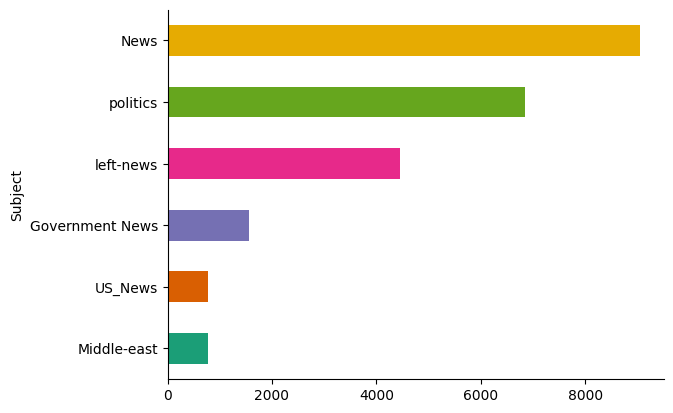

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
data_kaggle_fake.groupby('Subject').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
data_rus_fakes = pd.read_parquet('data/parquets/data_russian_fakes_raw.parquet')

In [20]:
data_rus_fakes.head(2)

,id,Narrative,Description,Fake,Original_text,ENG_Translation,Date,Link,Link_archive,Media,Country,Tag
0,1,Narrative concerning weapons provided to Ukrai...,<p>Russia spreads fakes that Ukrainians misuse...,Fake: Arms supplies to Ukraine prolong the war,Az orosz elnök szerint Moszkva nem az ukrajnai...,"According to the Russian President, Moscow is ...",2023-01-13,https://oroszhirek.hu/national-review-ket-forg...,https://web.archive.org/web/20230113161125/htt...,Orosz Hírek,Hungary,weapons
1,2,Narrative concerning weapons provided to Ukrai...,<p>Russia spreads fakes that Ukrainians misuse...,Fake: Arms supplies to Ukraine prolong the war,"A vitaműsorban részt vett Norbert Röttgen, a C...",CDU politician Norbert Röttgen took part in th...,2023-01-13,https://pestisracok.hu/georgpolitika-brutalis-...,https://archive.ph/F830R,PestiSrácok Blog,Hungary,weapons


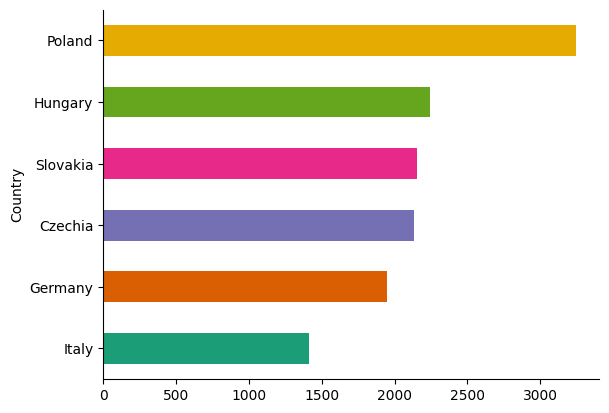

In [22]:
# @title Country

from matplotlib import pyplot as plt
import seaborn as sns
data_rus_fakes.groupby('Country').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

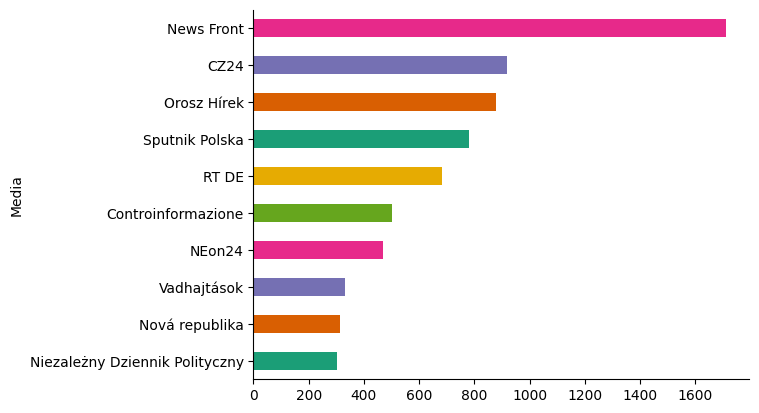

In [36]:
# @title Media

data_rus_fakes.groupby('Media').size().sort_values(ascending=True)[-10:].plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Topic modeling

In [38]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [42]:
corpus = data_rus_fakes["ENG_Translation"]

In [44]:
# Initialize stopwords, punctuation, lemmatizer, and stemmer
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define specific words to stem
words_to_stem = {'ukraine', 'ukrainian', 'russia', 'russian'}

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(stemmer.stem(word) if word in words_to_stem else lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

In [45]:
from gensim import corpora

# Creating document-term matrix
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [46]:
from gensim.models import LsiModel

# LSA model
lsa = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# LSA model
print(lsa.print_topics(num_topics=3, num_words=3))

[(0, '0.526*"ukrain" + 0.386*"ukrainian" + 0.282*"russia"'), (1, '0.729*"ukrainian" + -0.436*"ukrain" + -0.260*"russia"'), (2, '0.565*"russian" + -0.450*"ukrain" + 0.445*"russia"')]


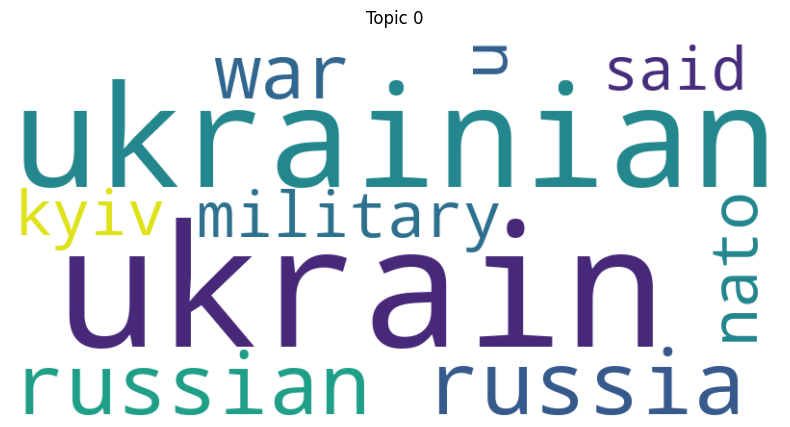

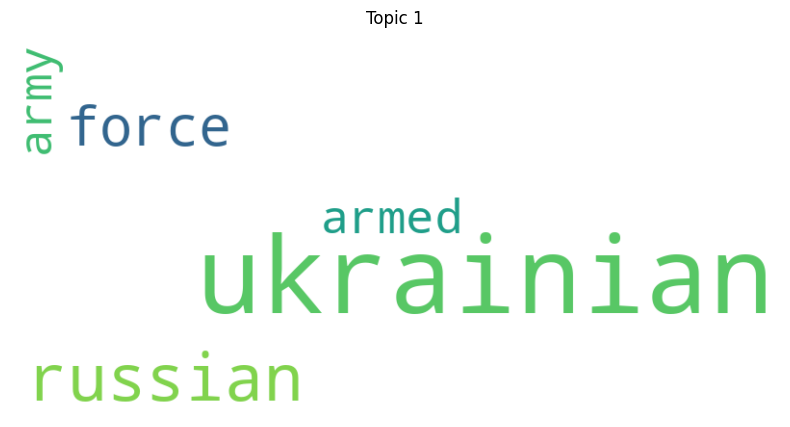

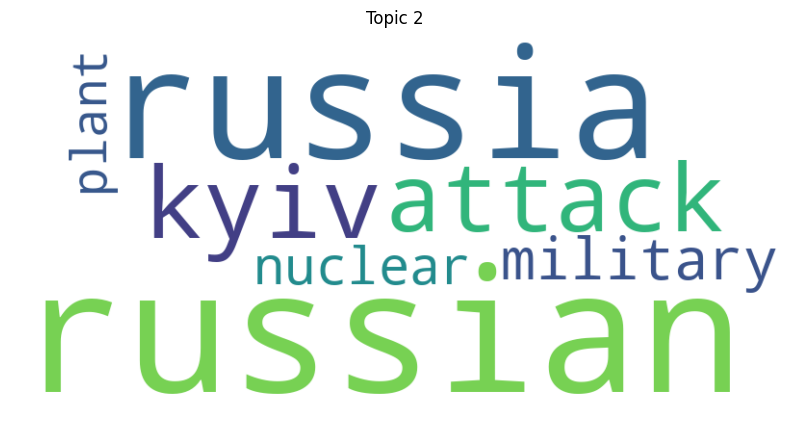

In [56]:
# Extract topics
topics = lsa.show_topics(num_topics=3, num_words=10, formatted=False)

for topic_id, topic in topics:
    topic_words = {word: weight for word, weight in topic}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Topic {topic_id}')
    plt.show()

In [47]:
from gensim.models import LdaModel

# LDA model
lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Results
print(lda.print_topics(num_topics=3, num_words=3))

[(0, '0.031*"ukrainian" + 0.013*"russian" + 0.012*"ukrain"'), (1, '0.025*"ukrain" + 0.023*"russia" + 0.016*"war"'), (2, '0.026*"ukrain" + 0.016*"ukrainian" + 0.009*"war"')]


In [54]:
# Flatten the list of lists and concatenate all strings into a single text string
text = ' '.join([' '.join(inner_list) for inner_list in clean_corpus])

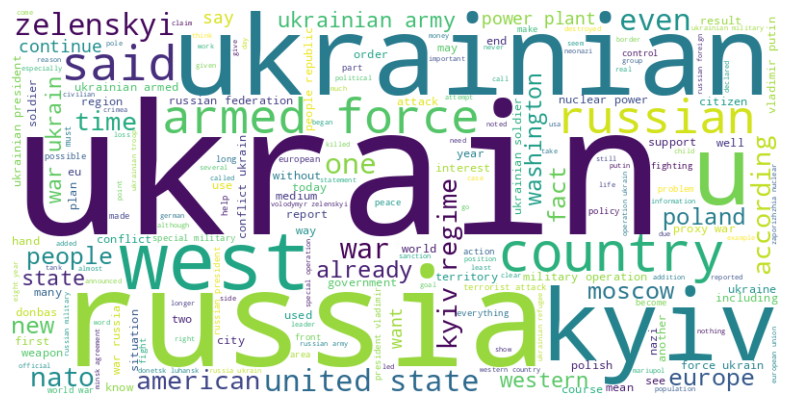

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
!pip install pyLDAvis

In [58]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [62]:
# Create the LSA model
# LDA model
lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Transform the corpus using the LSA model
corpus_lda = lda[doc_term_matrix]

# Prepare the visualization using pyLDAvis
vis_data = gensimvis.prepare(lda, corpus_lda, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
data_all = pd.read_parquet('data/parquets/data_all_raw.parquet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
corpus_all = data_all["Text"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# Create corpus of words from the texts
clean_corpus = [clean(doc).split() for doc in corpus_all]

# Creating document-term matrix
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# LDA model
lda = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)

# Results
print(lda.print_topics(num_topics=3, num_words=3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.015*"trump" + 0.007*"said" + 0.005*"president"'), (2, '0.011*"said" + 0.009*"war" + 0.009*"people"'), (3, '0.038*"ukrain" + 0.036*"ukrainian" + 0.032*"russian"')]


In [68]:
# Flatten the list of lists and concatenate all strings into a single text string
text = ' '.join([' '.join(inner_list) for inner_list in clean_corpus])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


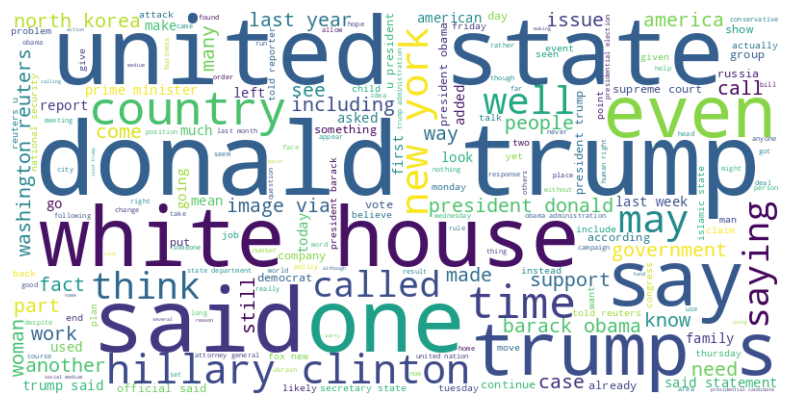

In [69]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [70]:
# Transform the corpus using the LSA model
corpus_lda = lda[doc_term_matrix]

# Prepare the visualization using pyLDAvis
vis_data = gensimvis.prepare(lda, corpus_lda, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Classification

In [72]:
data_all.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,Fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Load the data
# Assuming you have a parquet file with 'text' and 'Fake' columns
df = pd.read_parquet('data/parquets/data_all_raw.parquet')

# Preprocess the text data (basic preprocessing)
df['Text'] = df['Text'].str.lower().str.replace('[^\w\s]', '')

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Text']).toarray()
y = df['Fake']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence '\w'
<>:6: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-92-3673b4d148e8>:6: DeprecationWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.lower().str.replace('[^\w\s]', '')


In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and evaluate a logistic regression model using cross-validation
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Train the model on the full training set and evaluate on the test set
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Test metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print test metrics
print(f'Test Accuracy: {accuracy}')
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validation accuracy scores: [0.98718363 0.99009155 0.99052235 0.98966074 0.98750539]
Mean cross-validation accuracy: 0.988992730326023
Test Accuracy: 0.9906944683784249
Test Precision: 0.9929261324989798
Test Recall: 0.9923861318830728
Test F1 Score: 0.99265605875153


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


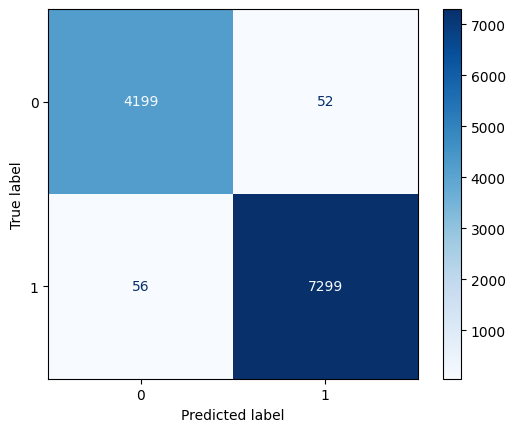

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [106]:
df[df.Fake == 0].loc[0].Text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [107]:
# Example new text message
new_message = """
 washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “the (trump) administration has already been willing to say: ‘we’re going to increase non-defense discretionary spending ... by about 7 percent,’” meadows, chairman of the small but influential house freedom caucus, said on the program. “now, democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. for a fiscal conservative, i don’t see where the rationale is. ... eventually you run out of other people’s money,” he said. meadows was among republicans who voted in late december for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “it’s interesting to hear mark talk about fiscal responsibility,” democratic u.s. representative joseph crowley said on cbs. crowley said the republican tax bill would require the  united states to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “this is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the house of representatives. i think we’re going to be paying for this for many, many years to come,” crowley said. republicans insist the tax package, the biggest u.s. tax overhaul in more than 30 years,  will boost the economy and job growth. house speaker paul ryan, who also supported the tax bill, recently went further than meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top republican priority in 2018. in republican parlance, “entitlement” programs mean food stamps, housing assistance, medicare and medicaid health insurance for the elderly, poor and disabled, as well as other programs created by washington to assist the needy. democrats seized on ryan’s early december remarks, saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. but the goals of house republicans may have to take a back seat to the senate, where the votes of some democrats will be needed to approve a budget and prevent a government shutdown. democrats will use their leverage in the senate, which republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “dreamers,” people brought illegally to the country as children. trump in september put a march 2018 expiration date on the deferred action for childhood arrivals, or daca, program, which protects the young immigrants from deportation and provides them with work permits. the president has said in recent twitter messages he wants funding for his proposed mexican border wall and other immigration law changes in exchange for agreeing to help the dreamers. representative debbie dingell told cbs she did not favor linking that issue to other policy objectives, such as wall funding. “we need to do daca clean,” she said.  on wednesday, trump aides will meet with congressional leaders to discuss those issues. that will be followed by a weekend of strategy sessions for trump and republican leaders on jan. 6 and 7, the white house said. trump was also scheduled to meet on sunday with florida republican governor rick scott, who wants more emergency aid. the house has passed an $81 billion aid package after hurricanes in florida, texas and puerto rico, and wildfires in california. the package far exceeded the $44 billion requested by the trump administration. the senate has not yet voted on the aid.
"""

# Preprocess the text message
new_message = new_message.lower().replace('[^\w\s]', '')

# Transform the text message using the same TF-IDF vectorizer
new_message_transformed = tfidf.transform([new_message]).toarray()

# Predict whether the message is fake or not
prediction = log_reg.predict(new_message_transformed)
prediction_proba = log_reg.predict_proba(new_message_transformed)

# Print the prediction
if prediction[0] == 1:
    print("The message is predicted to be fake.")
else:
    print("The message is predicted to be not fake.")

# Print the prediction probabilities
print(f"Prediction probabilities: {prediction_proba[0]}")

The message is predicted to be not fake.
Prediction probabilities: [0.99831272 0.00168728]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\w'
<>:7: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-107-3927f680a8b9>:7: DeprecationWarning: invalid escape sequence '\w'
  new_message = new_message.lower().replace('[^\w\s]', '')
